In [2]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# select the style from fivethityeight website
plt.style.use('fivethirtyeight') 
mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['axes.labelsize'] = 14
# mpl.rcParams['xtick.labelsize'] = 12
# mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

# predefined figsize
figsize=(30,20)

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
df1 = pd.read_csv('Ram.csv', index_col='Time')

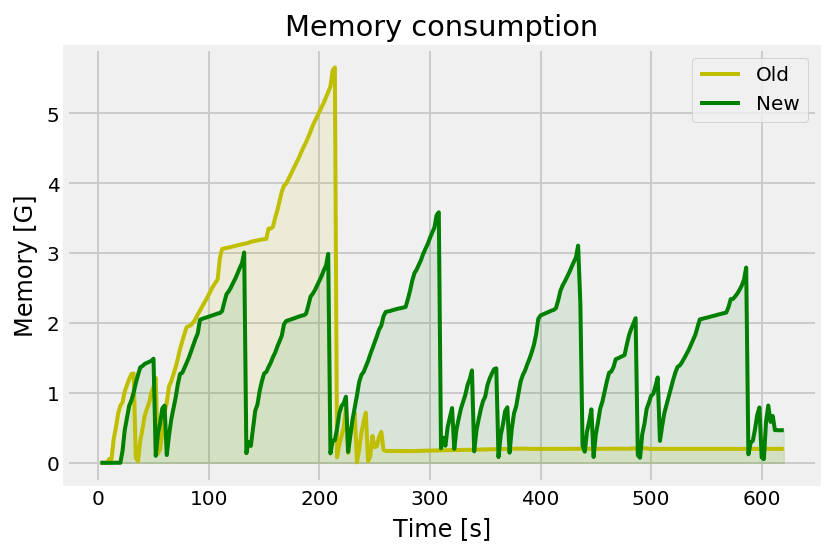

In [7]:
plt.plot(df1["Old"], label="Old", color='y')
plt.fill_between(df1.index,df1["Old"], color='y', alpha=0.1)
plt.plot(df1["New"], label="New", color='g')
plt.fill_between(df1.index,df1["New"], color='g', alpha=0.1)
plt.title("Memory consumption")
plt.xlabel("Time [s]")
plt.ylabel("Memory [G]")
plt.legend()
plt.savefig("memory_consumption.png")

In [74]:
df2 = pd.read_csv('Rectangle.csv')
logcolumns = ["Nodes", "Value"]
df2[logcolumns] = np.log(df2[logcolumns])
df2

,Nodes,Type,Value
0,7.427144,'exact-old',0.953972
1,8.095904,'exact-old',3.384390
2,8.794370,'exact-old',5.703782
3,7.427144,'exact-new',0.940007
4,8.095904,'exact-new',3.511545
5,8.794370,'exact-new',5.768321
6,7.427144,'stochastic-old',-2.364460
7,8.095904,'stochastic-old',-1.427116
8,8.794370,'stochastic-old',-0.632993
9,9.664024,'stochastic-old',0.463734


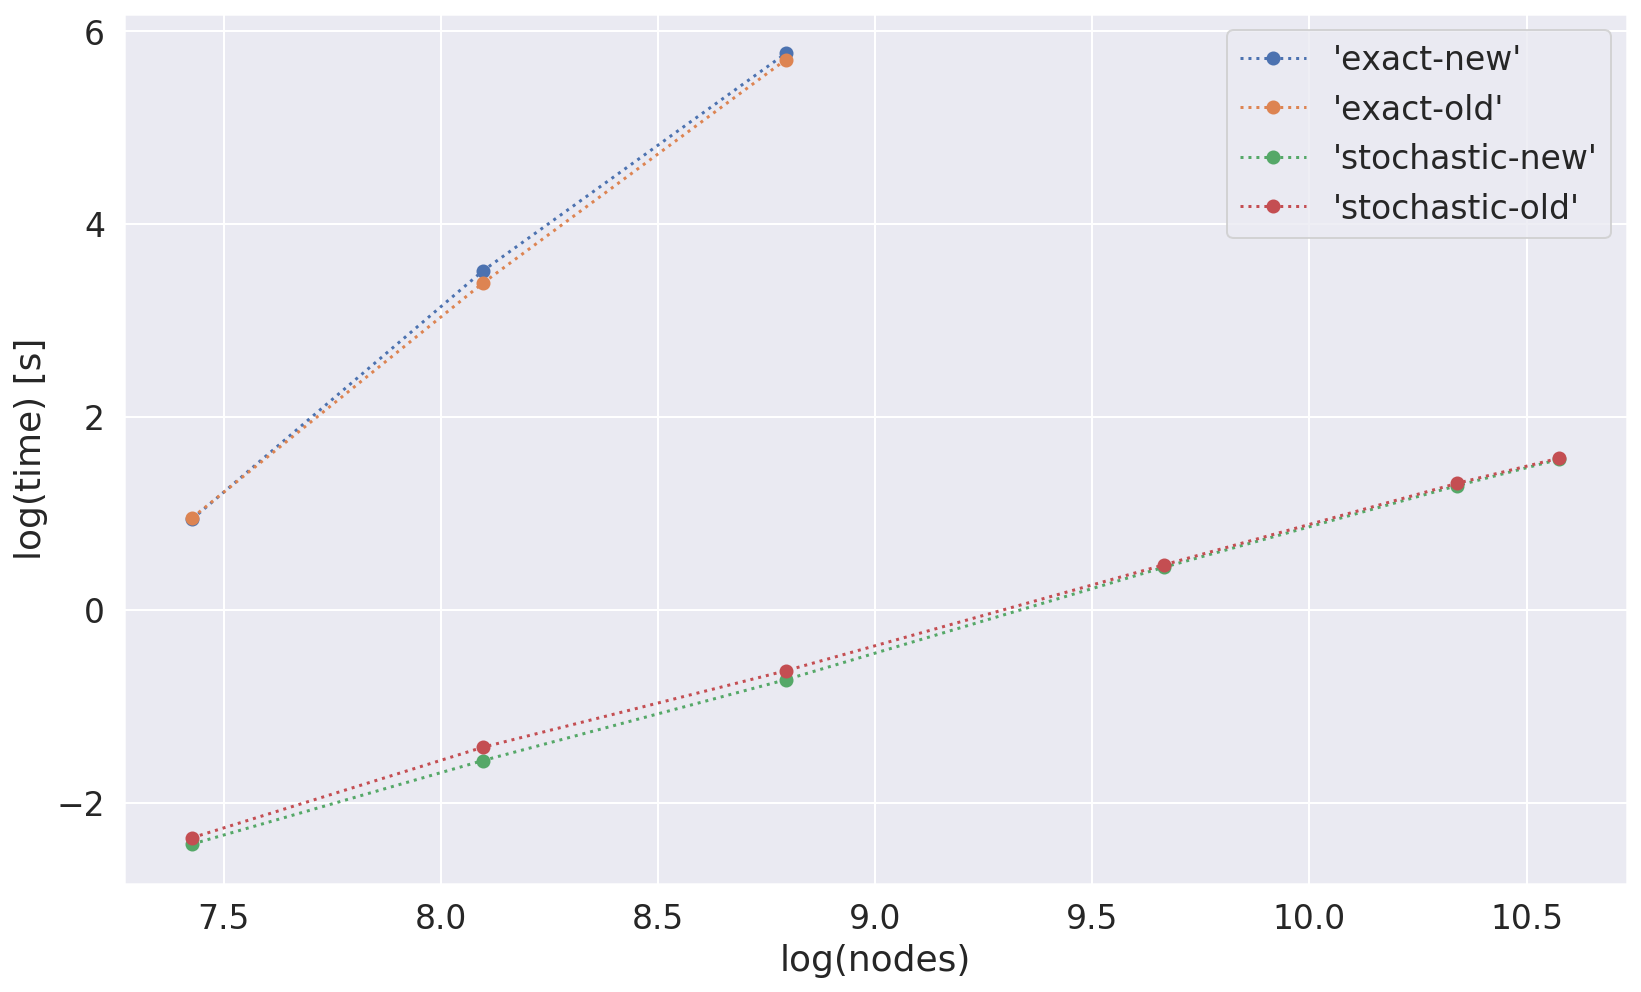

In [100]:
groups = df2.groupby('Type')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Nodes, group.Value, marker='.', linestyle=':', ms=12, label=name)
ax.legend()
plt.xlabel("log(nodes)")
plt.ylabel("log(time) [s]")
plt.savefig("time.png")